#DATA LOADING

In [ ]:
import sys 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from statsmodels.graphics.tsaplots import plot_acf
from sklearn import preprocessing
from category_encoders import TargetEncoder


In [ ]:
import pandas as pd
df = pd.read_csv('data_01.12.2020.csv', sep=',', parse_dates=['sales_date', 'first_registration'])

In [ ]:
df

,sales_date,first_registration,channel,brand,model,modelyear,fuel,listprice,mileage,region,sales_price
0,2017-01-01,2014-02-28,O,Volkswagen,JETTA (A6),2014.0,G,"$24,255",15986.0,Southeast,"$11,800"
1,2017-01-01,2014-05-30,O,Volkswagen,JETTA (A6),2014.0,G,"$22,905",7123.0,Pacific,"$10,739"
2,2017-01-01,2013-06-30,O,Audi,A4 Sedan,2013.0,G,"$54,165",28765.0,Pacific,"$28,707"
3,2017-01-01,2013-01-19,O,Volkswagen,Passat,2013.0,G,"$24,010",50415.0,Pacific,"$9,376"
4,2017-01-01,2014-03-20,O,Volkswagen,JETTA (A6),2014.0,G,"$24,585",35325.0,Northeast,"$10,500"
...,...,...,...,...,...,...,...,...,...,...,...
423461,2019-04-30,2018-06-29,O,Volkswagen,TIGUAN,2018.0,G,"$23,150",13176.0,NaN,"$12,600"
423462,2019-04-30,2018-03-15,O,Volkswagen,TIGUAN,2017.0,G,"$26,995",44045.0,NaN,"$12,000"
423463,2019-04-30,2018-03-23,O,Volkswagen,TIGUAN,2017.0,G,"$27,025",18601.0,Midwest,"$14,600"
423464,2019-04-30,2017-12-27,O,Volkswagen,TIGUAN,2017.0,G,"$26,945",42077.0,NaN,"$10,800"


# UNDERSTANDING DATA AND PERFORMING VISUALIZATIONS

In [ ]:
df.dtypes 
# There are a few categorical attributes (brand, model, fuel, region) which have to handled
# The date attributes (sales_date, first_registration) should be pre-processed to numerical attributes like year, month, day etc.

sales_date            datetime64[ns]
first_registration    datetime64[ns]
channel                       object
brand                         object
model                         object
modelyear                    float64
fuel                          object
listprice                     object
mileage                      float64
region                        object
sales_price                   object
dtype: object

In [ ]:
df.describe() #Statistical summary of numerical attributes

,modelyear,mileage
count,423465.000000,4.234650e+05
mean,2014.950650,3.127689e+04
std,1.099559,1.471936e+04
min,2009.000000,0.000000e+00
25%,2014.000000,2.179400e+04
50%,2015.000000,3.005700e+04
75%,2016.000000,3.868100e+04
max,2019.000000,1.118567e+06


## Remove columns that has only one value for all rows

In [ ]:
for column in df.columns:
    if df[column].value_counts().size ==1:
        df = df.drop(columns = [column])

#Drop rows that have NaN for all columns
df = df.dropna(how='all')

In [ ]:
categorical_attributes = [ 'brand', 'model', 'fuel', 'region']
for column in categorical_attributes:
    print('The values and frequencies of', column)
    print(df[column].value_counts(), '\n\n\n')
        

The values and frequencies of brand
Volkswagen    276378
Audi          146833
VOLKSWAGEN       254
Name: brand, dtype: int64 



The values and frequencies of model
Passat                   67541
JETTA GP                 64244
TIGUAN                   42118
JETTA (A6)               39391
Audi Q5                  27999
A4 Sedan                 27170
A3 Sedan                 23641
A6 Sedan                 18907
CCF                      13986
Audi Q7                  12485
PASSAT GP                11287
GTI (A7)                  7737
A5 Coupe                  7155
A7                        5976
Audi Q3                   5419
Beetle                    5200
A5 Cabriolet              5131
A8                        5018
Beetle Convertible        4527
E GOLF                    4003
Golf (A7)                 3408
Eos FL                    2853
A3 Cabriolet              2514
A4 allroad                2461
Touareg GP                2092
New Touareg               1332
Golf Sportwagen           121

In [ ]:
#Replace VOLKSWAGEN value with Volkswagen in Brand
df['brand'] = df['brand'].replace('VOLKSWAGEN', 'Volkswagen')
print(df['brand'].value_counts())

Volkswagen    276632
Audi          146833
Name: brand, dtype: int64


###Visualization of categorical attributes


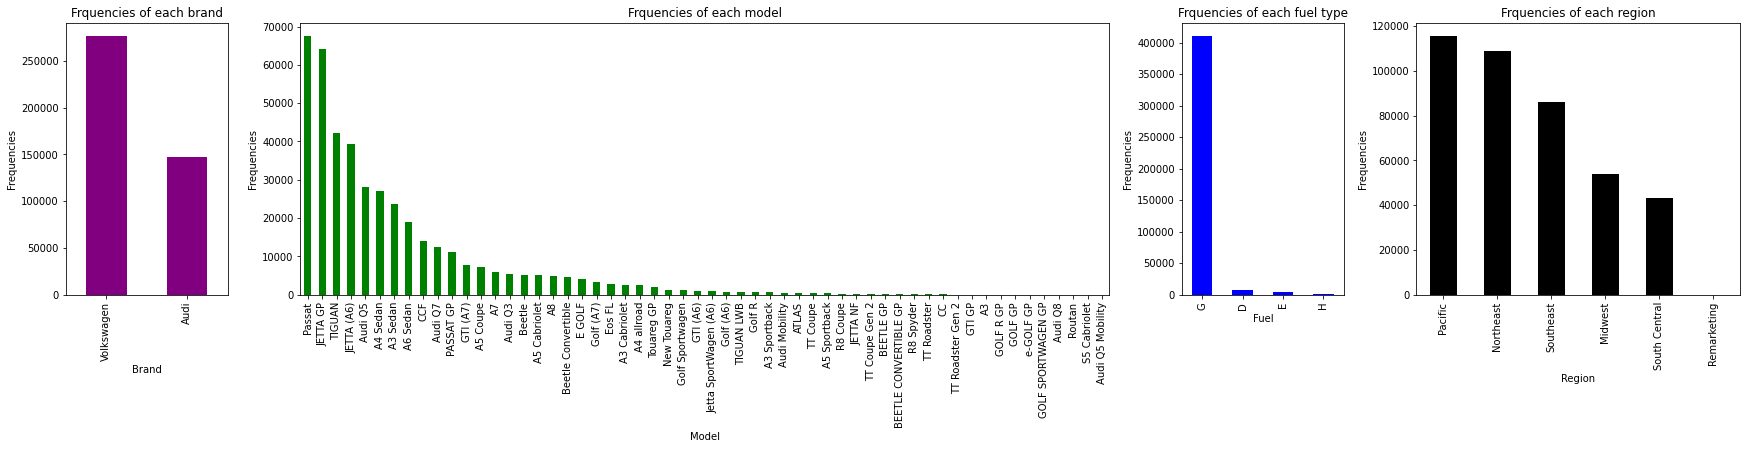

In [ ]:
#Visualizing categorical attributes
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30,5), gridspec_kw={'width_ratios': [1, 5, 1, 2]})
ax = df['brand'].value_counts().plot(kind='bar', ax=axes[0], color='purple')
ax.set_xlabel("Brand")
ax.set_ylabel("Frequencies")
ax.set_title("Frquencies of each brand")


ax = df['model'].value_counts().plot(kind='bar', ax=axes[1], color='green')
ax.set_xlabel("Model")
ax.set_ylabel("Frequencies")
ax.set_title("Frquencies of each model")

ax = df['fuel'].value_counts().plot(kind='bar', ax=axes[2], color='blue')
ax.set_xlabel("Fuel")
ax.set_ylabel("Frequencies")
ax.set_title("Frquencies of each fuel type")

ax = df['region'].value_counts().plot(kind='bar', ax=axes[3], color='black')
ax.set_xlabel("Region")
ax.set_ylabel("Frequencies")
ax.set_title("Frquencies of each region")

#axes[0, 1].axis('off')
plt.show() 


## Reformat Sales price and list price columns


In [ ]:

df['listprice'] = df['listprice'].apply(lambda x: float(x.replace('$','').replace(',','')))
df['sales_price'] = df['sales_price'].apply(lambda x: float(x.replace('$','').replace(',','')))

##Visualization of trends in Sales and List Price

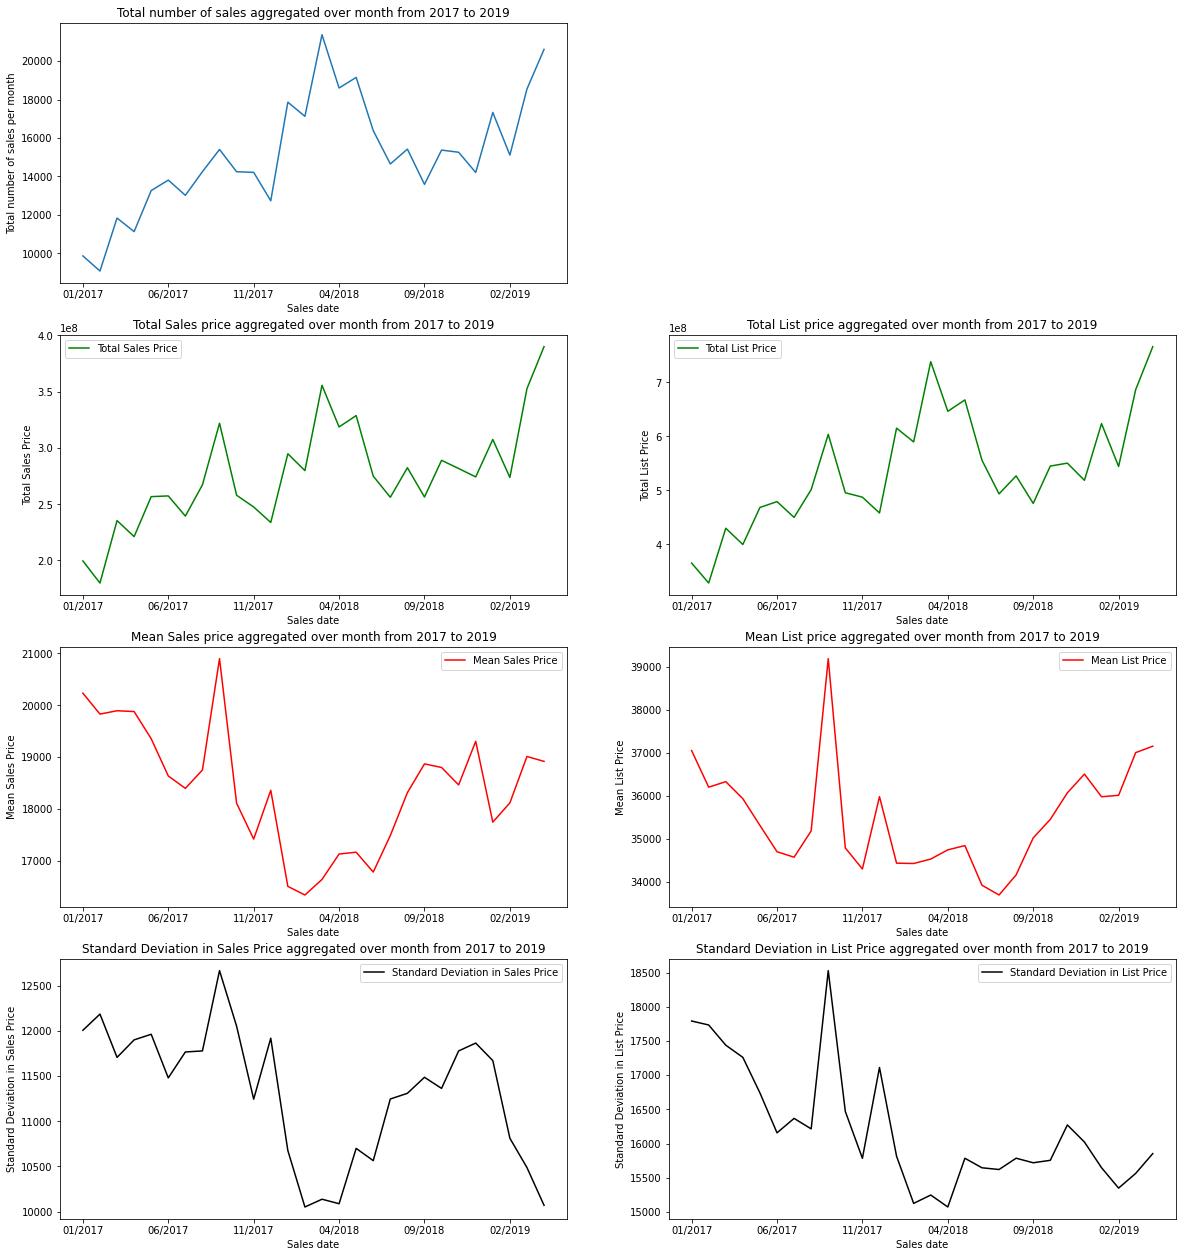

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,22))

#TOTAL NUMBER OF SALES
salesDate = df['sales_date'].dt.strftime('%m/%Y')
ax = salesDate.groupby(salesDate, sort=False).count().plot(kind='line', ax=axes[0,0])
ax.set_xlabel("Sales date")
ax.set_ylabel("Total number of sales per month")
ax.set_title("Total number of sales aggregated over month from 2017 to 2019")

#TOTAL SALES OF SALES  AND LIST PRICE
df1 = df.groupby(salesDate, sort=False)["sales_price"].sum().reset_index(name ='Total Sales Price')
ax = df1.plot(kind='line', x='sales_date', y='Total Sales Price', title='Total Sales price aggregated over month from 2017 to 2019', ax=axes[1,0], color='green') 
ax.set_xlabel("Sales date")
ax.set_ylabel("Total Sales Price")

df1 = df.groupby(salesDate, sort=False)["listprice"].sum().reset_index(name ='Total List Price')
ax = df1.plot(kind='line', x='sales_date', y='Total List Price', title='Total List price aggregated over month from 2017 to 2019', ax=axes[1,1], color='green') 
ax.set_xlabel("Sales date")
ax.set_ylabel("Total List Price")


#MEAN SALES OF SALES  AND LIST PRICE
df1 = df.groupby(salesDate, sort=False)["sales_price"].mean().reset_index(name ='Mean Sales Price')
ax = df1.plot(kind='line', x='sales_date', y='Mean Sales Price', title='Mean Sales price aggregated over month from 2017 to 2019', ax=axes[2,0], color='red') 
ax.set_xlabel("Sales date")
ax.set_ylabel("Mean Sales Price")

df1 = df.groupby(salesDate, sort=False)["listprice"].mean().reset_index(name ='Mean List Price')
ax = df1.plot(kind='line', x='sales_date', y='Mean List Price', title='Mean List price aggregated over month from 2017 to 2019', ax=axes[2,1], color='red') 
ax.set_xlabel("Sales date")
ax.set_ylabel("Mean List Price")


#STANDARD DEVIATION SALES OF SALES  AND LIST PRICE
df1 = df.groupby(salesDate, sort=False)["sales_price"].std().reset_index(name ='Standard Deviation in Sales Price')
ax = df1.plot(kind='line', x='sales_date', y='Standard Deviation in Sales Price', title='Standard Deviation in Sales Price aggregated over month from 2017 to 2019', ax=axes[3,0], color='black') 
ax.set_xlabel("Sales date")
ax.set_ylabel("Standard Deviation in Sales Price")

df1 = df.groupby(salesDate, sort=False)["listprice"].std().reset_index(name ='Standard Deviation in List Price')
ax = df1.plot(kind='line', x='sales_date', y='Standard Deviation in List Price', title='Standard Deviation in List Price aggregated over month from 2017 to 2019', ax=axes[3,1], color='black') 
ax.set_xlabel("Sales date")
ax.set_ylabel("Standard Deviation in List Price")

axes[0, 1].axis('off')
plt.show() 


##Visualization of Correlations among features

Correlations among features


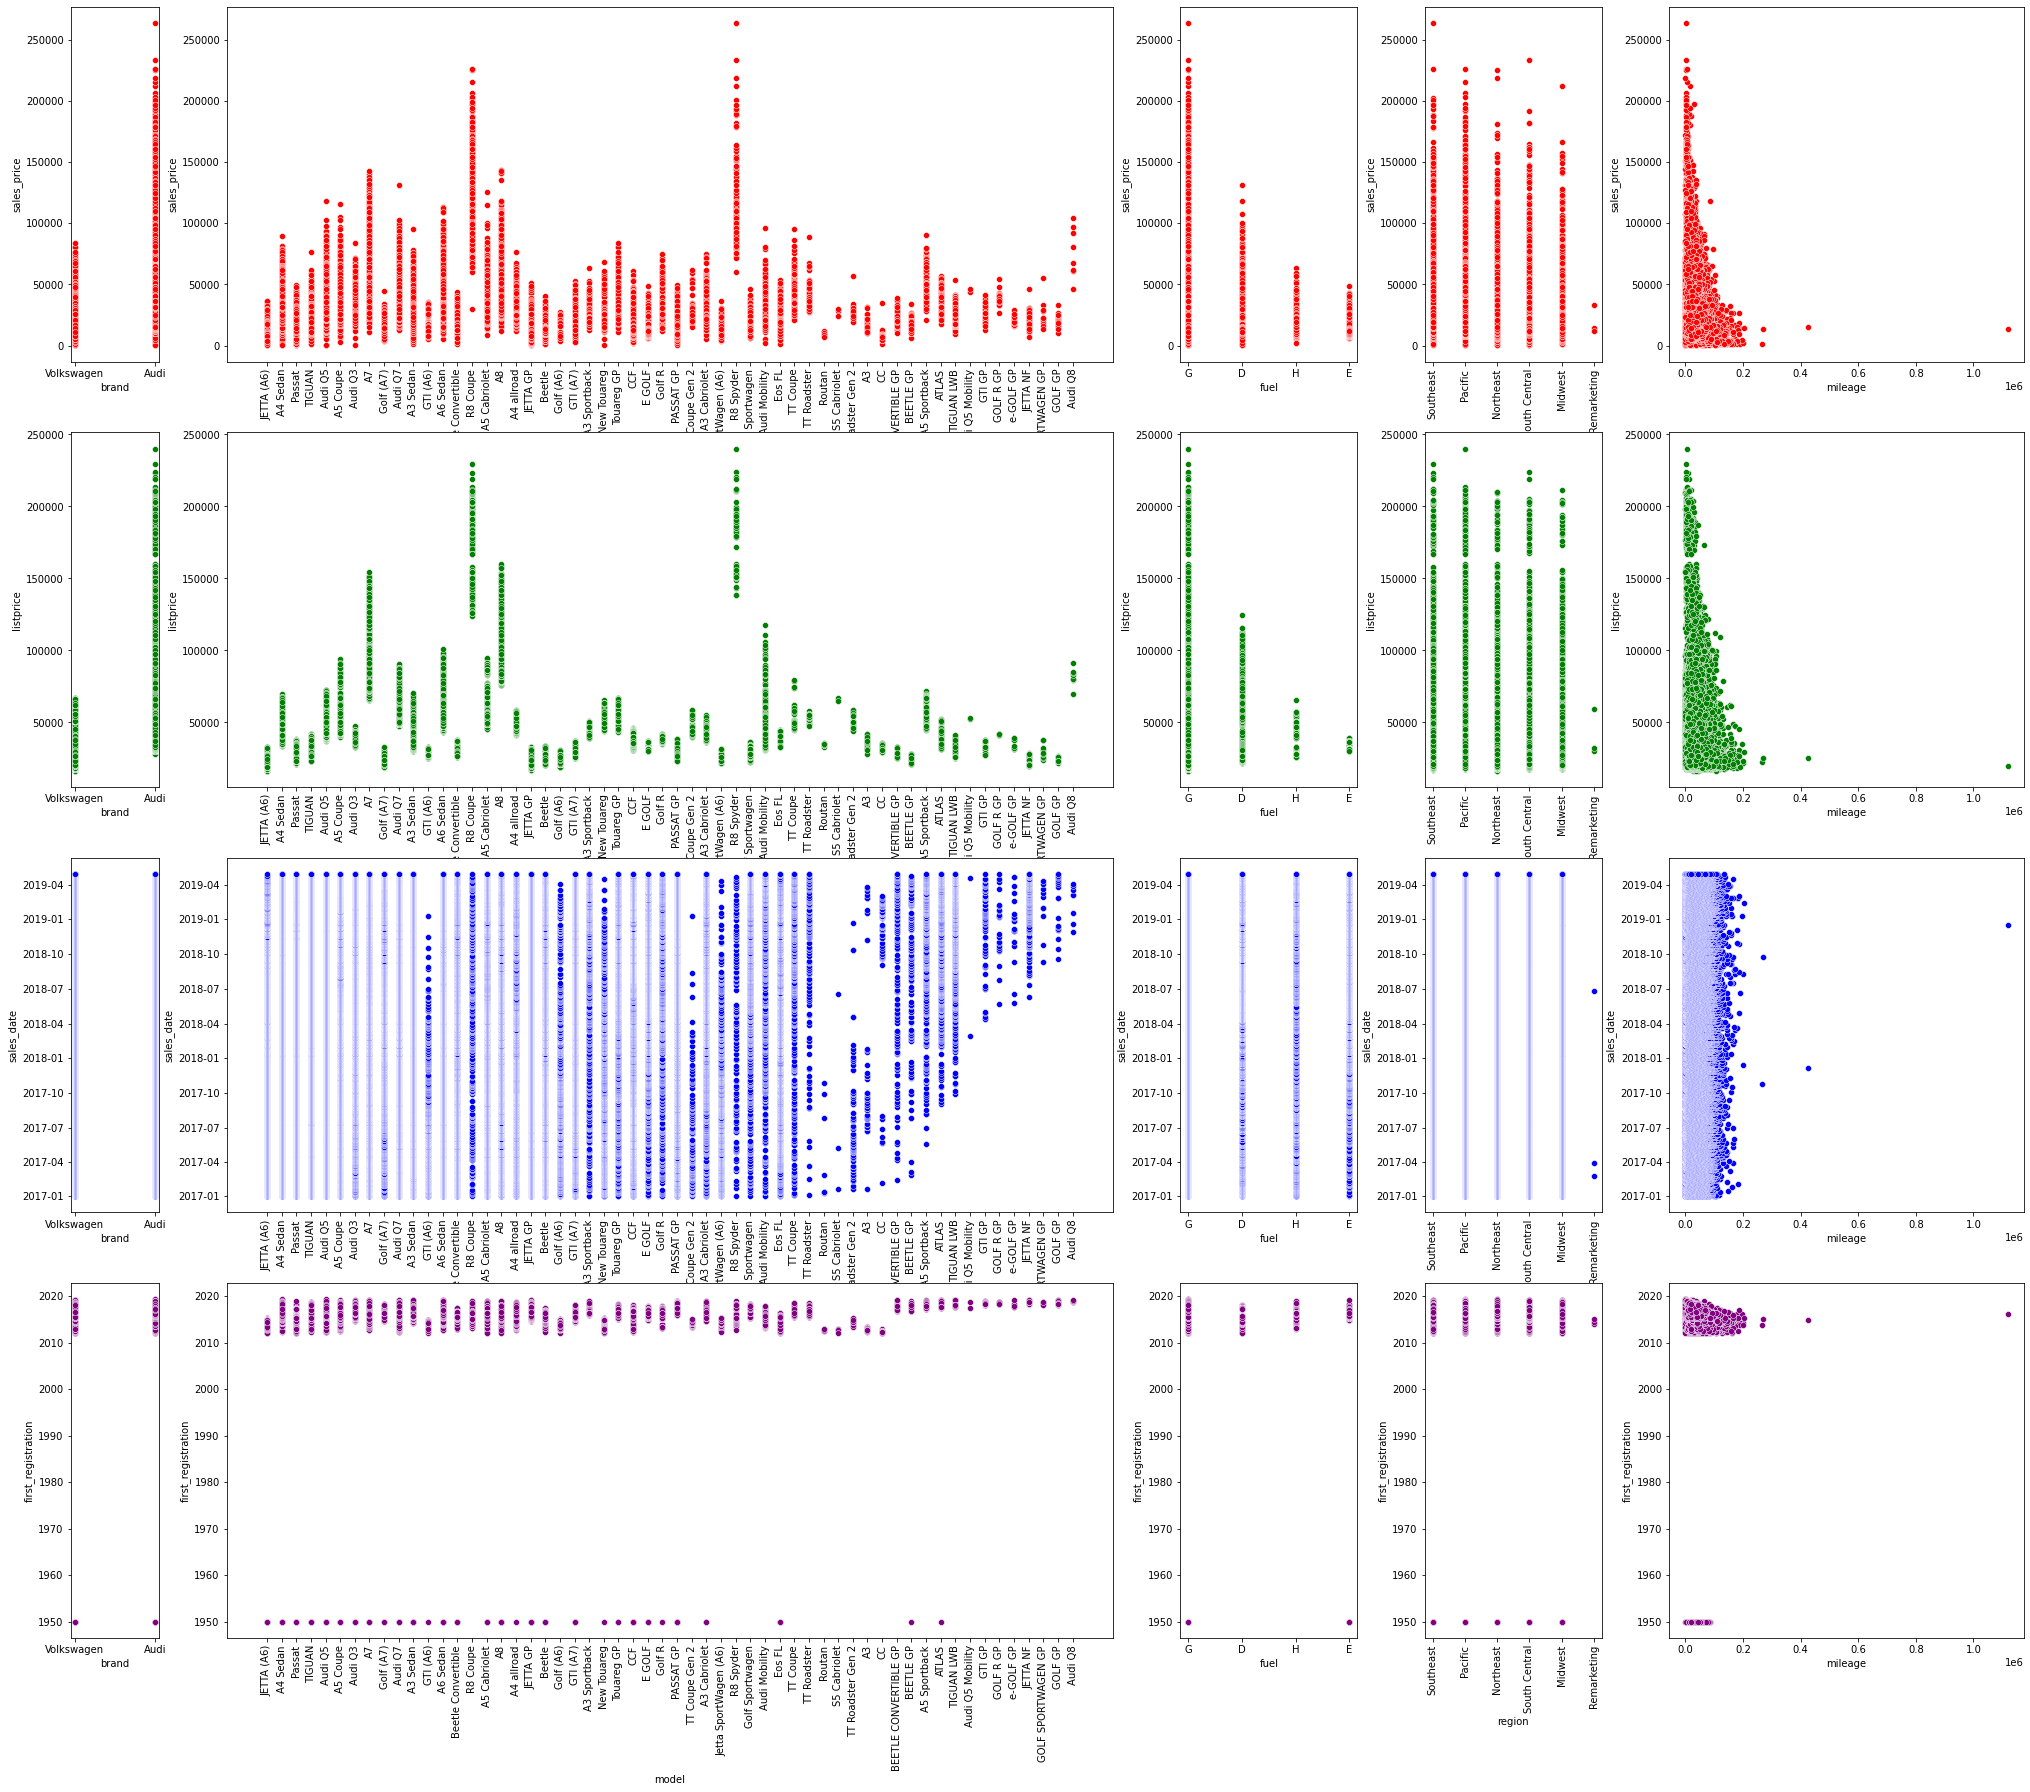

In [ ]:
print('Correlations among features')
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(35,30), gridspec_kw={'width_ratios': [0.5, 5, 1, 1,2]})

x_attributes = ['brand', 'model', 'fuel', 'region','mileage']
y_attributes = ['sales_price', 'listprice', 'sales_date', 'first_registration']
colors = ['red', 'green','blue', 'purple']

for row, y in enumerate(y_attributes):
  #CORRELATION OF ATTRIBUTES
  sns.scatterplot(x='brand', y=y, data=df,  ax=axes[row,0],color=colors[row])
  ax = sns.scatterplot(x='model', y=y, data=df,  ax=axes[row,1],color=colors[row])
  plt.setp(ax.get_xticklabels(), rotation=90)

  sns.scatterplot(x='fuel', y=y, data=df,  ax=axes[row,2],color=colors[row])
  ax = sns.scatterplot(x='region', y=y, data=df,  ax=axes[row,3],color=colors[row])
  plt.setp(ax.get_xticklabels(), rotation=90)
  sns.scatterplot(x='mileage', y=y, data=df,  ax=axes[row,4],color=colors[row])

plt.show() 


#DATA PREPROCESSING STEP

## Remove columns that has only one value for all rows

In [ ]:
print('Performed in the Visualization step')

Performed in the Visualization step


## Reformat Sales price and list price columns

In [ ]:
print('Performed in the Visualization step')

Performed in the Visualization step


## Remove duplicate rows

In [ ]:
print('Number of duplicate rows')
df.duplicated().value_counts()

Number of duplicate rows


False    423464
True          1
dtype: int64

In [ ]:
df = df.drop_duplicates(keep='first') #Remove the duplicate rows

##Removing logical ambiguities i.e Sales date earlier than the first registration

In [ ]:
salesDate = list(df['sales_date'])
firstRegistration = list(df['first_registration'])

removeIndices = []
for index, i in enumerate(salesDate):
    if(salesDate[index] < firstRegistration[index]):
      removeIndices.append(index)
          
print('The number of rows for which sales date is earlier than the first registration', len(removeIndices))
df = df.drop(removeIndices) #Removing such ambiguious rows

The number of rows for which sales date is earlier than the first registration 9


In [ ]:
listPrice = list(df['listprice'])
salesPrice = list(df['sales_price'])
count=0
for index in range(len(listPrice)):
    if listPrice[index]< salesPrice[index]:
      count +=1

print('The number of potential cases where the Sales price is greater than the listed price is', count) 
print('This might be a potential case for vintage cars') 

The number of potential cases where the Sales price is greater than the listed price is 7512
This might be a potential case for vintage cars


##Dealing with NaN

In [ ]:
df.isna().sum()  #To find the number of rows with NaN for each column

sales_date                0
first_registration      232
brand                     0
model                     0
modelyear                 0
fuel                      0
listprice                 0
mileage                   0
region                15779
sales_price               0
dtype: int64

In [ ]:
#Drop the rows with NaN for first_registration as Imputation does not make sense
df = df.dropna(subset=['first_registration'])

#Impute most frequent category for region
imp = SimpleImputer(strategy="most_frequent")
imp = imp.fit_transform(np.array(df['region']).reshape(-1,1))
np.save('RegionImputer.npy', imp)

In [ ]:
RegionImputer = np.load('RegionImputer.npy', allow_pickle=True)
df['region'] = RegionImputer



#Note the remaining part of pre-processing is carried in Task 2

In [ ]:
df.to_csv('data_01.12.2020_preprocessed.csv', index=False)